In [1]:
import pandas as pd
import numpy as np

In [2]:
telcom=pd.read_csv(r"E:\WA_Fn-UseC_-Telco-Customer-Churn.csv")
# 查找缺失值
pd.isnull(telcom).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# 数据集不均衡。
telcom["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#TotalCharges表示总费用，这里为对象类型，需要转换为float类型   
#convert_numeric=True表示强制转换数字(包括字符串)，不可转换的值变为NaN
telcom['TotalCharges']=telcom['TotalCharges'].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 再次查找是否存在缺失值
pd.isnull(telcom["TotalCharges"]).sum()

11

In [7]:
# 删除缺失值所在的行
telcom.dropna(inplace=True)

In [8]:
# 数据归一化处理
# 对Churn 列中的值 Yes和 No分别用 1和 0替换，方便后续处理
telcom['Churn'].replace(to_replace = 'Yes', value = 1,inplace = True)
telcom['Churn'].replace(to_replace = 'No', value = 0,inplace = True)
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [9]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# 使用one-hot编码
tel_dummies = pd.get_dummies(telcom.iloc[:,1:21])
tel_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10,1949.40,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
8,0,28,104.80,3046.05,1,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
9,0,62,56.15,3487.95,0,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [11]:
tel_dummies.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


Text(0.5, 1.0, 'Correlations between Churn and variables')

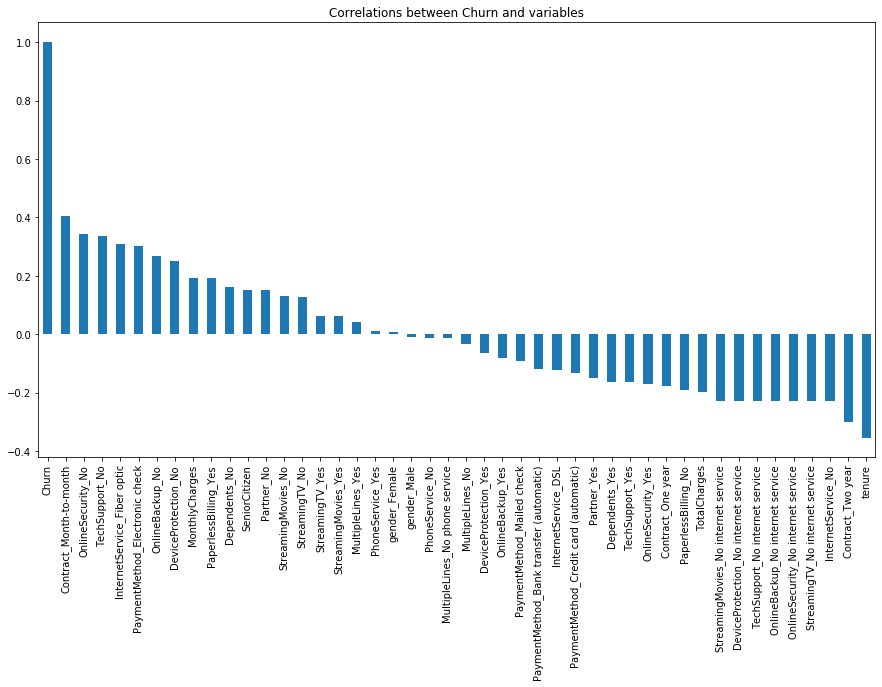

In [12]:
# 电信用户是否流失与各变量之间的相关性
plt.figure(figsize=(15,8))
tel_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between Churn and variables")

In [13]:
#数据预处理

#由前面结果可知，CustomerID表示每个客户的随机字符，对后续建模不影响，我这里选择删除CustomerID列
#gender 和 PhoneService 与流失率的相关性低，可直接忽略。
telcomvar=telcom.iloc[:,2:20]#从2开始 gender被排除
telcomvar.drop("PhoneService",axis=1, inplace=True)
telcomvar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
# 提取ID
telcom_id = telcom['customerID']

In [15]:
telcomvar[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


In [16]:
from sklearn.preprocessing import StandardScaler
#z = (x - u) / s 即 0均值归一化，使得预测结果不会被某些维度过大的特征值而主导
# 客户的职位、月费用和总费用
scaler = StandardScaler(copy=False)

# fit_transform()的作用就是先拟合数据，然后转化它将其转化为标准形式
scaler.fit_transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

#tranform()的作用是通过找中心和缩放等实现标准化
telcomvar[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

Text(0.5, 1.0, 'Check outliers of standardized tenure, MonthlyCharges and TotalCharges')

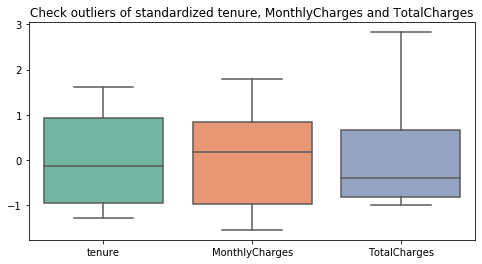

In [17]:
# 使用箱线图查看数据是否存在异常值
plt.figure(figsize = (8,4))
numbox = sns.boxplot(data=telcomvar[['tenure','MonthlyCharges','TotalCharges']], palette="Set2")
plt.title("Check outliers of standardized tenure, MonthlyCharges and TotalCharges")

In [18]:
# 查看对象类型字段中存在的值
def uni(columnlabel):
    print(columnlabel,"--" ,telcomvar[columnlabel].unique())  # unique函数去除其中重复的元素，返回唯一值
    
telcomobject=telcomvar.select_dtypes(['object'])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [19]:
# 综合之前的结果来看，在六个变量中存在No internet service，即无互联网服务对客户流失率影响很小
# 这些客户不使用任何互联网产品，因此可以将No internet service 和 No 是一样的效果，可以使用 No 替代 No internet service
telcomvar.replace(to_replace='No internet service', value='No', inplace=True)
telcomvar.replace(to_replace='No phone service', value='No', inplace=True)
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
from sklearn.preprocessing import LabelEncoder 
# 使用Scikit-learn标签编码,将分类数据转换为整数编码
def labelencode(columnlabel):
    telcomvar[columnlabel] = LabelEncoder().fit_transform(telcomvar[columnlabel])

for i in range(0,len(telcomobject.columns)):
    labelencode(telcomobject.columns[i])
    
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- [1 0]
Dependents -- [0 1]
MultipleLines -- [0 1]
InternetService -- [0 1 2]
OnlineSecurity -- [0 1]
OnlineBackup -- [1 0]
DeviceProtection -- [0 1]
TechSupport -- [0 1]
StreamingTV -- [0 1]
StreamingMovies -- [0 1]
Contract -- [0 1 2]
PaperlessBilling -- [1 0]
PaymentMethod -- [2 3 0 1]


In [21]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
"""
api:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
交叉验证函数StratifiedShuffleSplit，功能是从样本数据中随机按比例选取训练数据（train）和测试数据（test）
参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
参数test_size和train_size是用来设置train/test对中train和test所占的比例
参数 random_state控制是将样本随机打乱

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, 
which returns stratified randomized folds.
The folds are made by preserving the percentage of samples for each class.
"""
X=telcomvar
y=telcom["Churn"].values

sss=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(sss)
print("训练数据和测试数据被分成的组数：",sss.get_n_splits(X,y))

# 建立训练数据和测试数据
for train_index, test_index in sss.split(X, y):
    print("train:", train_index, "test:", test_index)
    X_train,X_test=X.iloc[train_index], X.iloc[test_index]
    y_train,y_test=y[train_index], y[test_index]

# 输出数据集大小
print('原始数据特征：', X.shape,
      '训练数据特征：',X_train.shape,
      '测试数据特征：',X_test.shape)

print('原始数据标签：', y.shape,
      '   训练数据标签：',y_train.shape,
      '   测试数据标签：',y_test.shape)


StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
训练数据和测试数据被分成的组数： 5
train: [3780 1588 2927 ... 3956 6130 6814] test: [5126 2423 2498 ... 6703 6618 6010]
train: [6916 6953 5388 ... 6156 3262 3471] test: [4097 4734 2309 ... 1278 1724 5508]
train: [1218 2877 3756 ...  848 4568 6967] test: [ 133 1822 5303 ... 3150 5611 4569]
train: [2552 4723 2055 ... 4030 2165 1994] test: [ 233  438 4434 ... 4625 1121 3422]
train: [4040 1561 6463 ... 2550 6727 4009] test: [4581 3898 3153 ... 2095 1765 2249]
原始数据特征： (7032, 17) 训练数据特征： (5625, 17) 测试数据特征： (1407, 17)
原始数据标签： (7032,)    训练数据标签： (5625,)    测试数据标签： (1407,)


In [22]:
from sklearn.ensemble import RandomForestClassifier          # 随机森林
from sklearn.svm import SVC, LinearSVC                       # 支持向量机
from sklearn.linear_model import LogisticRegression          # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier           # KNN算法
from sklearn.naive_bayes import GaussianNB                   # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier              # 决策树分类器
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier     

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer



# 使用分类算法
Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()]
]


Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1_score=2*precision*recall/(precision+recall)
    class_eva=pd.DataFrame([recall,precision,f1_score])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["recall","precision","f1score"]
result

,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree,AdaBoostClassifier,GradientBoostingClassifier
recall,0.441176,0.459893,0.548128,0.478610,0.740642,0.500000,0.548128,0.545455
precision,0.604396,0.696356,0.652866,0.561129,0.552894,0.492105,0.672131,0.673267
f1score,0.510046,0.553945,0.595930,0.516595,0.633143,0.496021,0.603829,0.602659
